![logo](https://user-images.githubusercontent.com/21340147/192824830-dcbe8d09-2b10-431d-bd9a-b4624192dcc9.png)
<br/>
<br/>

[Semidán Robaina](https://github.com/Robaina), September 2022.

In this Notebook, we will use Pynteny through its command-line interface to find candidate peptide sequences beloging to the _susC_-_susD_ gene pair within unannotated, fully sequenced, genomes of marine prokaryotic organisms. 

The pair _susC_-_susD_ is characteristic of the phylum _Bacteroidota_ and allows these bacteria to feed on long polysaccharides collected from the environment through a ["pedal-bin" mechanism](https://www.nature.com/articles/s41467-020-20285-y). _Bacteroidota_ is found across different environments, including the oceans, soil and our gut.

Interestingly, _susC_, a TomB-dependent membrane protein, has a number of [known homologs](https://www.ebi.ac.uk/interpro/entry/InterPro/IPR023996/), such as _RagA_ and _OmpW_. Hence, labelling unannotated sequences as _susC_ solely based on sequence similarity may be difficult to accomplish. Here, we are going to leverage the genomic context information of the pair _susC_-_susD_ to reduce function annotation uncertainty. Since the gene pair is specific to _Bacteroidota_, wi will also explore the taxonomy assigned to the environmental sequences.

Note that we could have conducted the same search through [Pynteny's python API](example_api.ipynb). Find more info in the [documentation pages](https://robaina.github.io/Pynteny/). Let's start by importing some required modules.

In [2]:
import pandas as pd

## Preprocess data

In this notebook, we will start directly with the already-built peptide database, which contains positional information in sequence labels. We have also previously downloaded the [PGAP](https://academic.oup.com/nar/article/49/D1/D1020/6018440)'s profile HMM database.

These steps are shown [here](example_cli.ipynb)

## Search synteny structure in MAR ref

We are going to use pynteny's `search` subcommand to search for the gene pair _susC_-_susD_ within the MAR ref database:

```
>OMP_RagA_SusC 0 >SusD
```

Here, we are using the gene symbols as found in the metadata file of the [PGAP](https://academic.oup.com/nar/article/49/D1/D1020/6018440)'s profile HMM database. We the above synteny structure, we are searching for peptide sequences matching the profile HMM corresponding to these gene symbols, which are also arranged in this particular order, all in the positive (sense) strand, as indicated by `>`, and which are located exactly next to each other in the same contig (no ORFs allowed between them, as indicated by a maximum number of in-between ORFs of 0 in all cases.)

It would be interesting to compare the results generated by using the above synteny structure with those generated by simply matching the gene _susC_, that is, without considering genomic context. Hence, we will run pynteny's `search` subcommand also for this second case.

In [9]:
%%bash

pynteny search \
 --data data/labeled_marref.fasta \
 --outdir example_sus/SusC_SusD_results \
 --synteny_struc ">OMP_RagA_SusC 0 >SusD" --gene_ids \
 --hmmsearch_args "-E 1e-10" \
 --hmm_dir data/hmms/hmm_PGAP \
 --hmm_meta data/hmms/hmm_meta.tsv


    ____              __                  
   / __ \__  ______  / /____  ____  __  __
  / /_/ / / / / __ \/ __/ _ \/ __ \/ / / /
 / ____/ /_/ / / / / /_/  __/ / / / /_/ / 
/_/    \__, /_/ /_/\__/\___/_/ /_/\__, /  
      /____/                     /____/   

Synteny-based Hmmer searches made easy, v0.0.2
Semidán Robaina Estévez (srobaina@ull.edu.es), 2022
 

2022-11-02 11:09:55,122 | INFO: Finding matching HMMs for gene symbols
2022-11-02 11:09:55,190 | INFO: Found the following HMMs in database for given structure:
>TIGR04056.1 0 >NF033071.0
2022-11-02 11:09:55,228 | INFO: Searching database by synteny structure
2022-11-02 11:09:55,228 | WARNING: Repeating hmmsearch arg: '-E 1e-10' for all HMMs
2022-11-02 11:09:55,228 | INFO: Running Hmmer
2022-11-02 11:10:26,334 | INFO: Filtering results by synteny structure
2022-11-02 11:10:53,135 | INFO: Writing matching sequences to FASTA files
2022-11-02 11:10:56,393 | INFO: Finished!


In [10]:
%%bash

pynteny search \
 --data data/labeled_marref.fasta \
 --outdir example_sus/SusC_results \
 --synteny_struc ">OMP_RagA_SusC" --gene_ids \
 --hmmsearch_args "-E 1e-10" \
 --hmm_dir data/hmms/hmm_PGAP \
 --hmm_meta data/hmms/hmm_meta.tsv


    ____              __                  
   / __ \__  ______  / /____  ____  __  __
  / /_/ / / / / __ \/ __/ _ \/ __ \/ / / /
 / ____/ /_/ / / / / /_/  __/ / / / /_/ / 
/_/    \__, /_/ /_/\__/\___/_/ /_/\__, /  
      /____/                     /____/   

Synteny-based Hmmer searches made easy, v0.0.2
Semidán Robaina Estévez (srobaina@ull.edu.es), 2022
 

2022-11-02 11:14:26,905 | INFO: Finding matching HMMs for gene symbols
2022-11-02 11:14:26,967 | INFO: Found the following HMMs in database for given structure:
>TIGR04056.1
2022-11-02 11:14:26,998 | INFO: Searching database by synteny structure
2022-11-02 11:14:26,998 | WARNING: Repeating hmmsearch arg: '-E 1e-10' for all HMMs
2022-11-02 11:14:26,998 | INFO: Running Hmmer
2022-11-02 11:14:49,058 | INFO: Filtering results by synteny structure
2022-11-02 11:16:06,518 | INFO: Writing matching sequences to FASTA files
2022-11-02 11:16:08,192 | INFO: Finished!


Pynteny has generated a number of output files in the provided output directory. HMMER3 hit results are stored within the subdirectory `hmmer_outputs`. The main output file, `synteny_matched.tsv` contains the labels of the matched sequences grouped by synteny block and sorted by gene number within their parent contig. The remaining (FASTA) files contain the retrieved peptide sequences for each gene symbol / HMM name in the synteny structure.

## Assigning GTDB taxonomy to sequence hits

The pair _susC_-_susD_ is specific to phylum _Bacteroidota_. Let's check if the taxonomy assigned to the retrieved sequences matches that phylum. To this end, we will extract that info from the MAR ref database itself, which provides a metadata file that contains GTDB taxonomical information for each genome in it.

In [ ]:
# Assign species (GTDB) to each genome ID
meta = pd.read_csv("data/MARref_v7/MarRef_1.7.tsv", sep="\t")

def assign_tax(genome_id: str) -> str:
    try:
        return meta.loc[
            meta['acc:genbank'].str.contains(f'ena.embl:{genome_id.split(".")[0]}'), 'tax:gtdb_classification'
            ].item().split(">")[1]
    except:
        return ""

In [4]:
# SusC - SusD
susC_susD  = pd.read_csv("example_sus/SusC_SusD_results/synteny_matched.tsv", sep="\t")
susC_susD ["taxonomy"] = susC_susD .contig.apply(assign_tax)
susC_susD .to_csv("example_sus/SusC_SusD_results/synteny_matched_tax.tsv", sep="\t", index=False)

# SusC
susC = pd.read_csv("example_sus/SusC_results/synteny_matched.tsv", sep="\t")
susC["taxonomy"] = susC.contig.apply(assign_tax)
susC.to_csv("example_sus/SusC_results/synteny_matched_tax.tsv", sep="\t", index=False)

## Let's do some basic statistics

Alright, everything is ready. Let's briefly explore the results obtained by our pynteny searches. First, let's count the total number of hits correspondin to _susC_ and to the pair _susC_-_susD_.

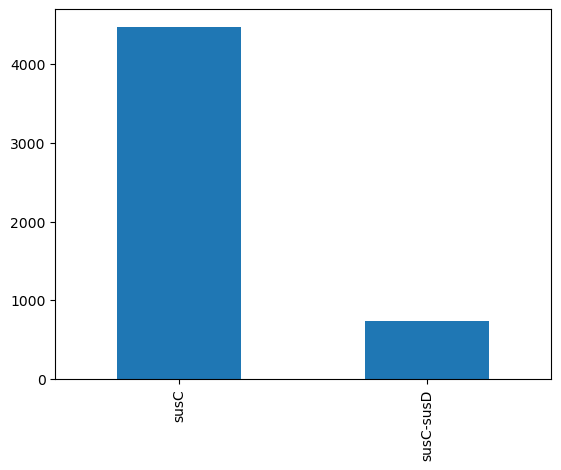

In [8]:
hit_counts = {
    "susC": susC.shape[0],
    "susC-susD": susC_susD.shape[0],
}
ax = pd.Series(hit_counts).plot(kind="bar")

As expected, _susC_-_susD_ received fewer hits than _susC_. Let's check next whether these hits belog to phylum _Bacteroidota_.

In [6]:
susC_susD.taxonomy.value_counts()

p__Bacteroidota    718
                    12
Name: taxonomy, dtype: int64

As expected, all hits to the pair _susC_-_susD_ belog to _Bacteroidota_, as it is specific to that phylum. What about hits corresponding to _susC_ alone?

In [5]:
susC.taxonomy.value_counts()

p__Bacteroidota          3865
p__Proteobacteria         430
                           91
p__Desulfobacterota        33
p__Calditrichota           22
p__Cyanobacteria            7
p__Campylobacterota         7
p__Myxococcota              7
p__Desulfobacterota_F       5
p__Aquificota               1
p__Synergistota             1
p__Acidobacteriota          1
p__Verrucomicrobiota        1
p__Spirochaetota            1
p__Firmicutes               1
Name: taxonomy, dtype: int64

Well, the majority still belong to _Bacteroidota_, but we see other phyla represented as well, particularly _Proteobacteria_.